In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Колір у точці (400, 380): [240 165  86]


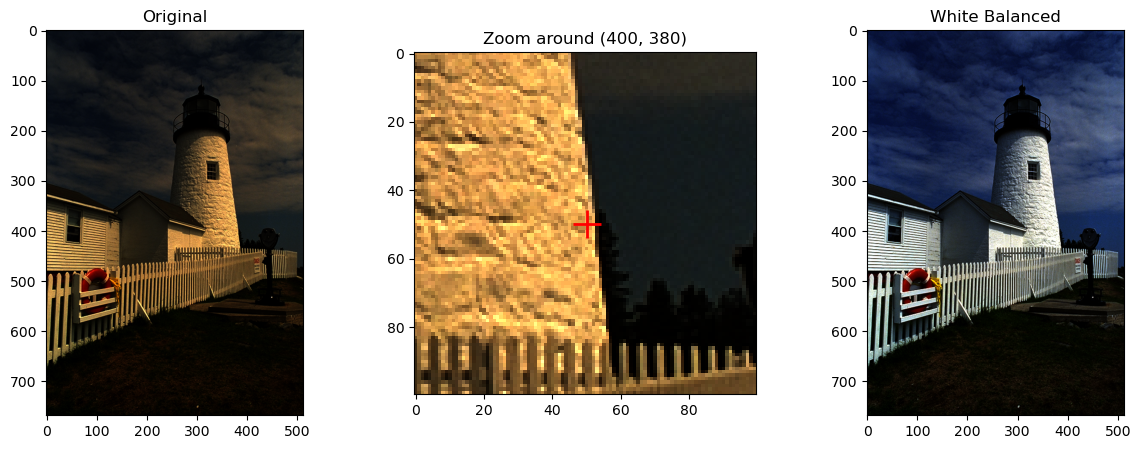

In [2]:
plt.rcParams['figure.figsize'] = [15, 5]
img = cv2.imread('data/dark.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Select coordinates
row, col = 400, 380  
white = img[row, col, :]
print(f"Колір у точці ({row}, {col}): {white}")

coeffs = 255.0/white

# Apply white balancing
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

balanced = balanced/255
balanced[balanced > 1] = 1

# Zooming
zoom_size = 50
row_start = max(0, row - zoom_size)
row_end = min(img.shape[0], row + zoom_size)
col_start = max(0, col - zoom_size)
col_end = min(img.shape[1], col + zoom_size)

zoomed = img[row_start:row_end, col_start:col_end, :]

# Original
plt.subplot(131), plt.imshow(img), plt.title('Original')
plt.subplot(132), plt.imshow(zoomed), plt.title(f'Zoom around ({row}, {col})')
# Zoom with pointer
plt.plot(zoom_size, zoom_size, 'r+', markersize=20, markeredgewidth=2)
# Show w/balanced
plt.subplot(133), plt.imshow(balanced), plt.title('White Balanced')
white_balanced = balanced 
plt.show()

Середні значення - R: 44.36, G: 35.50, B: 23.05
Коефіцієнти - kr: 1.000, kg: 1.250, kb: 1.925


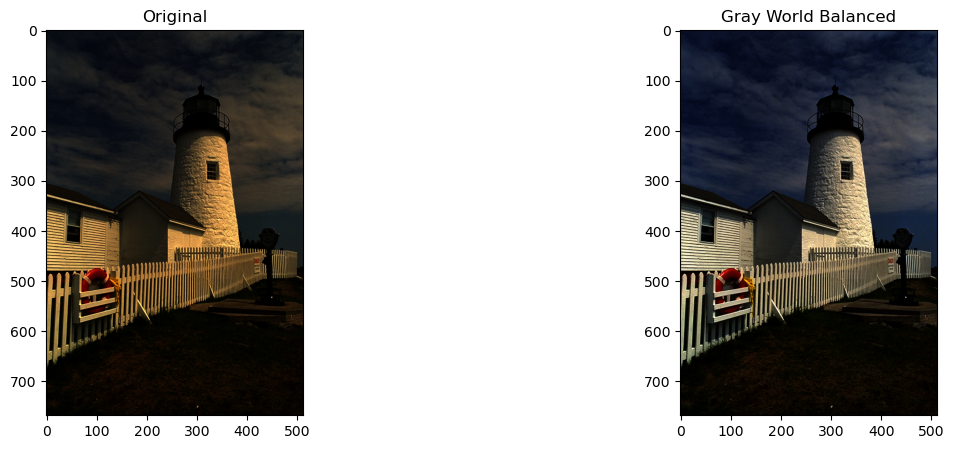

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]


img = cv2.imread('data/dark.png') 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the mean values for all three colour channels (red, green, blue)
mean_r = np.mean(img[:, :, 0])
mean_g = np.mean(img[:, :, 1])
mean_b = np.mean(img[:, :, 2])

print(f"Середні значення - R: {mean_r:.2f}, G: {mean_g:.2f}, B: {mean_b:.2f}")

# Compute the coefficients kr, kg, kb

max_mean = max(mean_r, mean_g, mean_b)
kr = max_mean / mean_r
kg = max_mean / mean_g
kb = max_mean / mean_b

print(f"Коефіцієнти - kr: {kr:.3f}, kg: {kg:.3f}, kb: {kb:.3f}")

# Apply color balancing and generate the balanced image
balanced = np.zeros_like(img, dtype=np.float32)
balanced[:, :, 0] = img[:, :, 0] * kr
balanced[:, :, 1] = img[:, :, 1] * kg
balanced[:, :, 2] = img[:, :, 2] * kb

# Clip values to valid range
balanced = np.clip(balanced, 0, 255).astype(np.uint8)

# Show the original and the balanced image side by side
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(balanced), plt.title('Gray World Balanced')
gray_world_balanced = balanced
plt.show()

Максимальні значення - R: 255, G: 255, B: 255


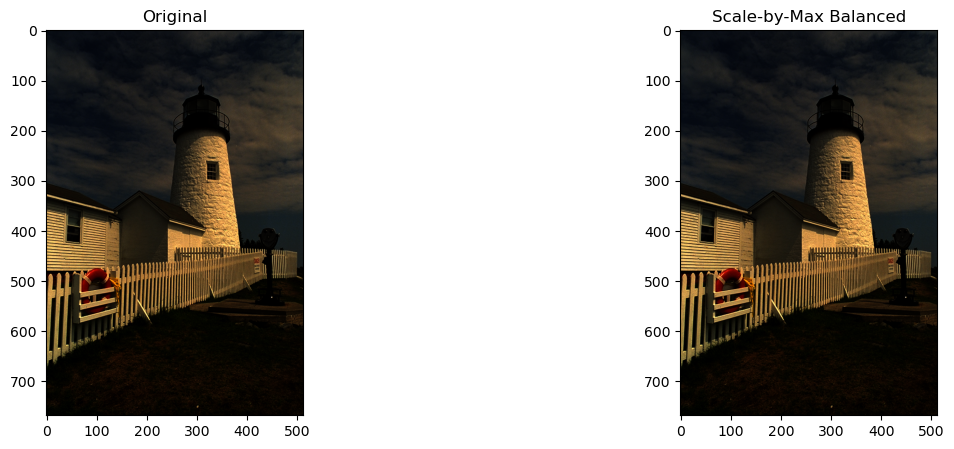

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]


img = cv2.imread('data/dark.png')  
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the maximum values for all three colour channels (red, green, blue)
max_r = np.max(img[:, :, 0])
max_g = np.max(img[:, :, 1])
max_b = np.max(img[:, :, 2])

print(f"Максимальні значення - R: {max_r}, G: {max_g}, B: {max_b}")

# Apply scale-by-max balancing and generate the balanced image
balanced = np.zeros_like(img, dtype=np.float32)
balanced[:, :, 0] = (img[:, :, 0] / max_r) * 255
balanced[:, :, 1] = (img[:, :, 1] / max_g) * 255
balanced[:, :, 2] = (img[:, :, 2] / max_b) * 255

balanced = balanced.astype(np.uint8)

plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(balanced), plt.title('Scale-by-Max Balanced')
scale_max_balanced = balanced 
plt.show()

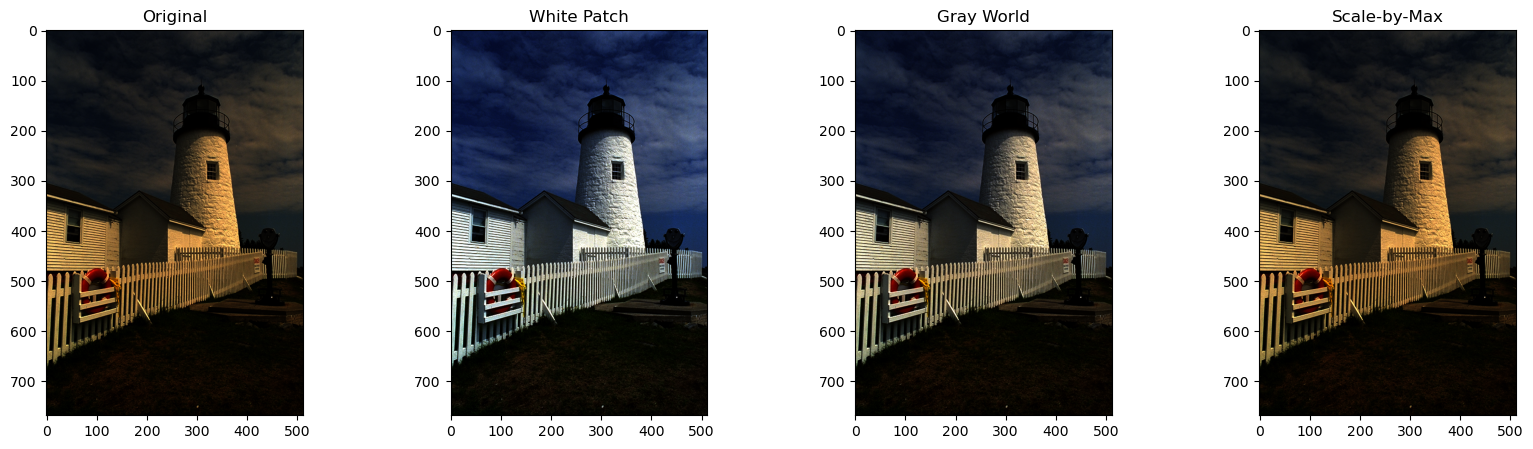

In [141]:
plt.rcParams['figure.figsize'] = [20, 5]

# Compare results
plt.subplot(141), plt.imshow(img), plt.title('Original')
plt.subplot(142), plt.imshow(white_balanced), plt.title('White Patch')
plt.subplot(143), plt.imshow(gray_world_balanced), plt.title('Gray World')
plt.subplot(144), plt.imshow(scale_max_balanced), plt.title('Scale-by-Max')
plt.show()

Колір у точці (490, 880): [255 245 132]


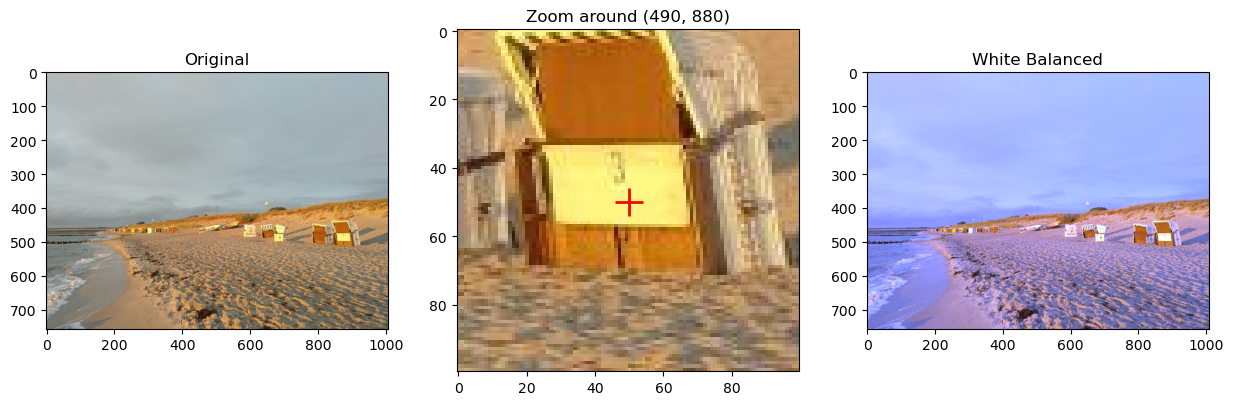

In [6]:
plt.rcParams['figure.figsize'] = [15, 5]
img = cv2.imread('data/sea.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


row, col = 490, 880  
white = img[row, col, :]
print(f"Колір у точці ({row}, {col}): {white}")

coeffs = 255.0/white

# Apply white balancing
balanced1 = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced1[..., channel] = img[..., channel] * coeffs[channel]

balanced1 = balanced1/255
balanced1[balanced1 > 1] = 1

# Zooming
zoom_size = 50
row_start = max(0, row - zoom_size)
row_end = min(img.shape[0], row + zoom_size)
col_start = max(0, col - zoom_size)
col_end = min(img.shape[1], col + zoom_size)

zoomed = img[row_start:row_end, col_start:col_end, :]

# Original
plt.subplot(131), plt.imshow(img), plt.title('Original')
plt.subplot(132), plt.imshow(zoomed), plt.title(f'Zoom around ({row}, {col})')
# Zoom with pointer
plt.plot(zoom_size, zoom_size, 'r+', markersize=20, markeredgewidth=2)
# Show w/balanced
plt.subplot(133), plt.imshow(balanced1), plt.title('White Balanced')
white_balanced1 = balanced1
plt.show()

Середні значення - R: 162.26, G: 156.82, B: 144.08
Коефіцієнти - kr: 1.000, kg: 1.035, kb: 1.126


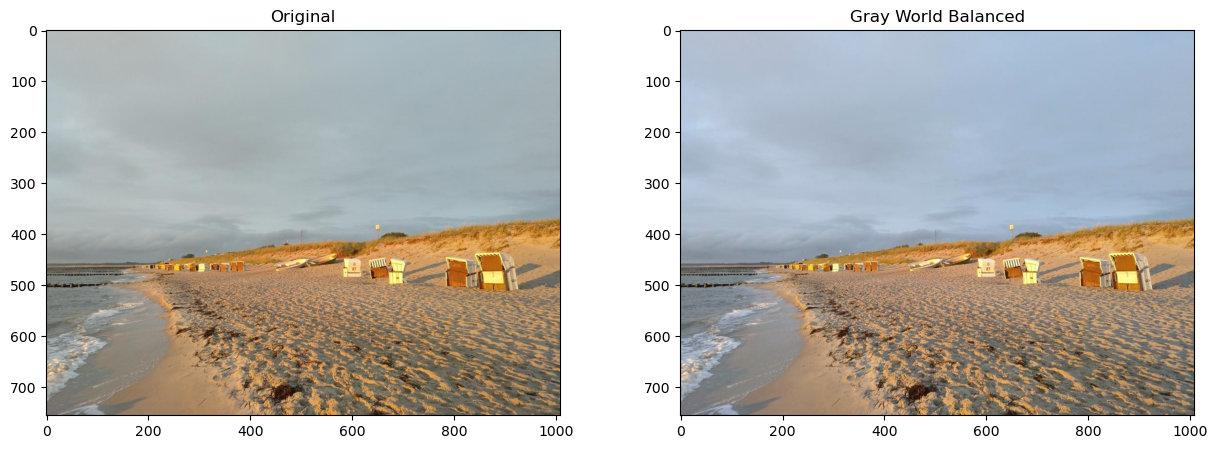

In [143]:
# Compute the mean values for all three colour channels (red, green, blue)
mean_r = np.mean(img[:, :, 0])
mean_g = np.mean(img[:, :, 1])
mean_b = np.mean(img[:, :, 2])

print(f"Середні значення - R: {mean_r:.2f}, G: {mean_g:.2f}, B: {mean_b:.2f}")

# Compute the coefficients kr, kg, kb

max_mean = max(mean_r, mean_g, mean_b)
kr = max_mean / mean_r
kg = max_mean / mean_g
kb = max_mean / mean_b

print(f"Коефіцієнти - kr: {kr:.3f}, kg: {kg:.3f}, kb: {kb:.3f}")

# Apply color balancing and generate the balanced image
balanced1 = np.zeros_like(img, dtype=np.float32)
balanced1[:, :, 0] = img[:, :, 0] * kr
balanced1[:, :, 1] = img[:, :, 1] * kg
balanced1[:, :, 2] = img[:, :, 2] * kb

# Clip values to valid range
balanced1 = np.clip(balanced1, 0, 255).astype(np.uint8)

# Show the original and the balanced image side by side
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(balanced1), plt.title('Gray World Balanced')
gray_world_balanced1 = balanced1
plt.show()

Максимальні значення - R: 255, G: 255, B: 237


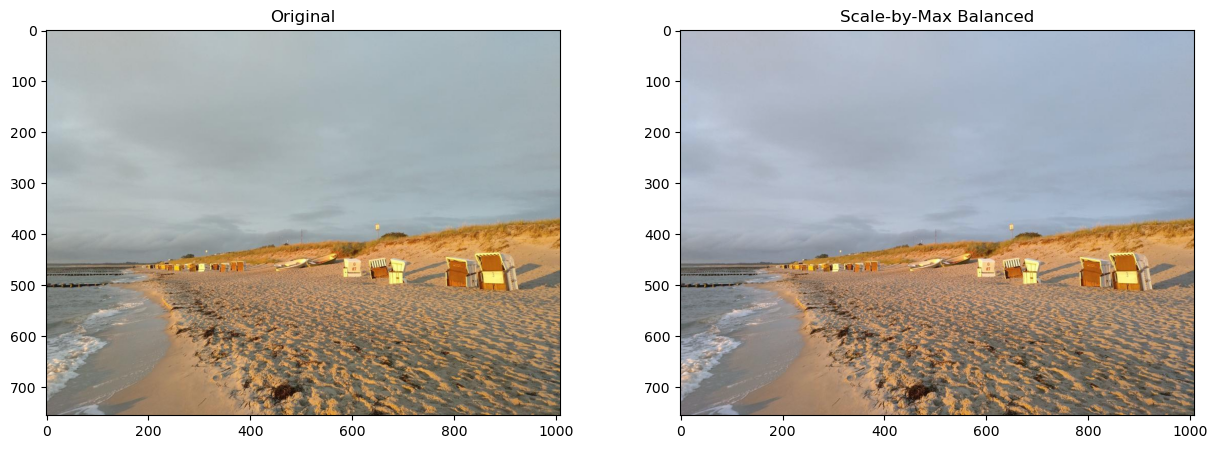

In [144]:
# Compute the maximum values for all three colour channels (red, green, blue)
max_r = np.max(img[:, :, 0])
max_g = np.max(img[:, :, 1])
max_b = np.max(img[:, :, 2])

print(f"Максимальні значення - R: {max_r}, G: {max_g}, B: {max_b}")

# Apply scale-by-max balancing and generate the balanced image
balanced1 = np.zeros_like(img, dtype=np.float32)
balanced1[:, :, 0] = (img[:, :, 0] / max_r) * 255
balanced1[:, :, 1] = (img[:, :, 1] / max_g) * 255
balanced1[:, :, 2] = (img[:, :, 2] / max_b) * 255

balanced1 = balanced1.astype(np.uint8)

plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(balanced1), plt.title('Scale-by-Max Balanced')
scale_max_balanced1 = balanced1 
plt.show()

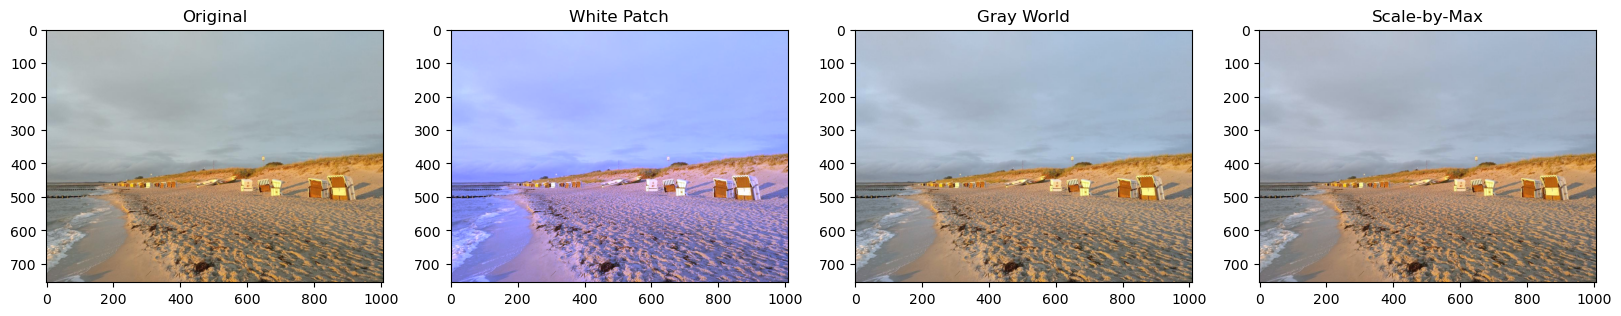

In [145]:
plt.rcParams['figure.figsize'] = [20, 5]

# Compare results
plt.subplot(141), plt.imshow(img), plt.title('Original')
plt.subplot(142), plt.imshow(white_balanced1), plt.title('White Patch')
plt.subplot(143), plt.imshow(gray_world_balanced1), plt.title('Gray World')
plt.subplot(144), plt.imshow(scale_max_balanced1), plt.title('Scale-by-Max')
plt.show()

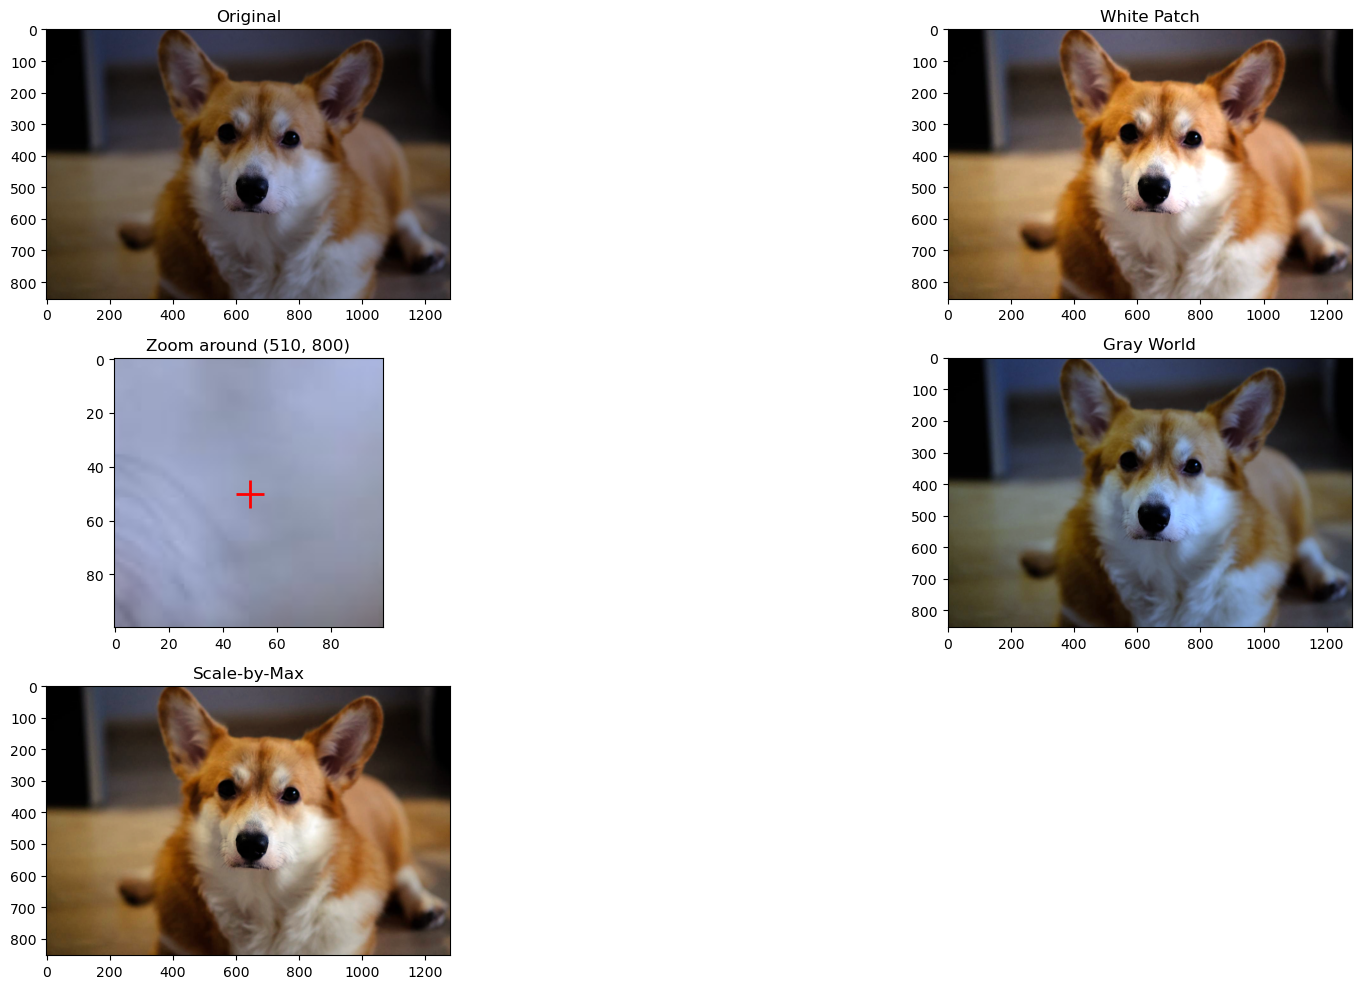

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]


img = cv2.imread('data/9083.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# ===== WHITE PATCH =====
row, col = 510, 800
white = img[row, col, :]
coeffs_wp = 255.0/white
white_balanced = np.zeros_like(img, dtype=np.float32)
# Zooming
zoom_size = 50
row_start = max(0, row - zoom_size)
row_end = min(img.shape[0], row + zoom_size)
col_start = max(0, col - zoom_size)
col_end = min(img.shape[1], col + zoom_size)

zoomed = img[row_start:row_end, col_start:col_end, :]
for channel in range(3):
    white_balanced[..., channel] = img[..., channel] * coeffs_wp[channel]
white_balanced = white_balanced/255
white_balanced[white_balanced > 1] = 1

# ===== GRAY WORLD =====
mean_r = np.mean(img[:, :, 0])
mean_g = np.mean(img[:, :, 1])
mean_b = np.mean(img[:, :, 2])
max_mean = max(mean_r, mean_g, mean_b)
kr = max_mean / mean_r
kg = max_mean / mean_g
kb = max_mean / mean_b
gray_world_balanced = np.zeros_like(img, dtype=np.float32)
gray_world_balanced[:, :, 0] = img[:, :, 0] * kr
gray_world_balanced[:, :, 1] = img[:, :, 1] * kg
gray_world_balanced[:, :, 2] = img[:, :, 2] * kb
gray_world_balanced = np.clip(gray_world_balanced, 0, 255).astype(np.uint8)

# ===== SCALE-BY-MAX =====
max_r = np.max(img[:, :, 0])
max_g = np.max(img[:, :, 1])
max_b = np.max(img[:, :, 2])
scale_max_balanced = np.zeros_like(img, dtype=np.float32)
scale_max_balanced[:, :, 0] = (img[:, :, 0] / max_r) * 255
scale_max_balanced[:, :, 1] = (img[:, :, 1] / max_g) * 255
scale_max_balanced[:, :, 2] = (img[:, :, 2] / max_b) * 255
scale_max_balanced = scale_max_balanced.astype(np.uint8)

# ===== Compare =====
plt.subplot(321), plt.imshow(img), plt.title('Original')
plt.subplot(322), plt.imshow(white_balanced), plt.title('White Patch')
plt.subplot(323), plt.imshow(zoomed), plt.title(f'Zoom around ({row}, {col})')
# Zoom with pointer
plt.plot(zoom_size, zoom_size, 'r+', markersize=20, markeredgewidth=2)
plt.subplot(324), plt.imshow(gray_world_balanced), plt.title('Gray World')
plt.subplot(325), plt.imshow(scale_max_balanced), plt.title('Scale-by-Max')
plt.tight_layout()
plt.show()

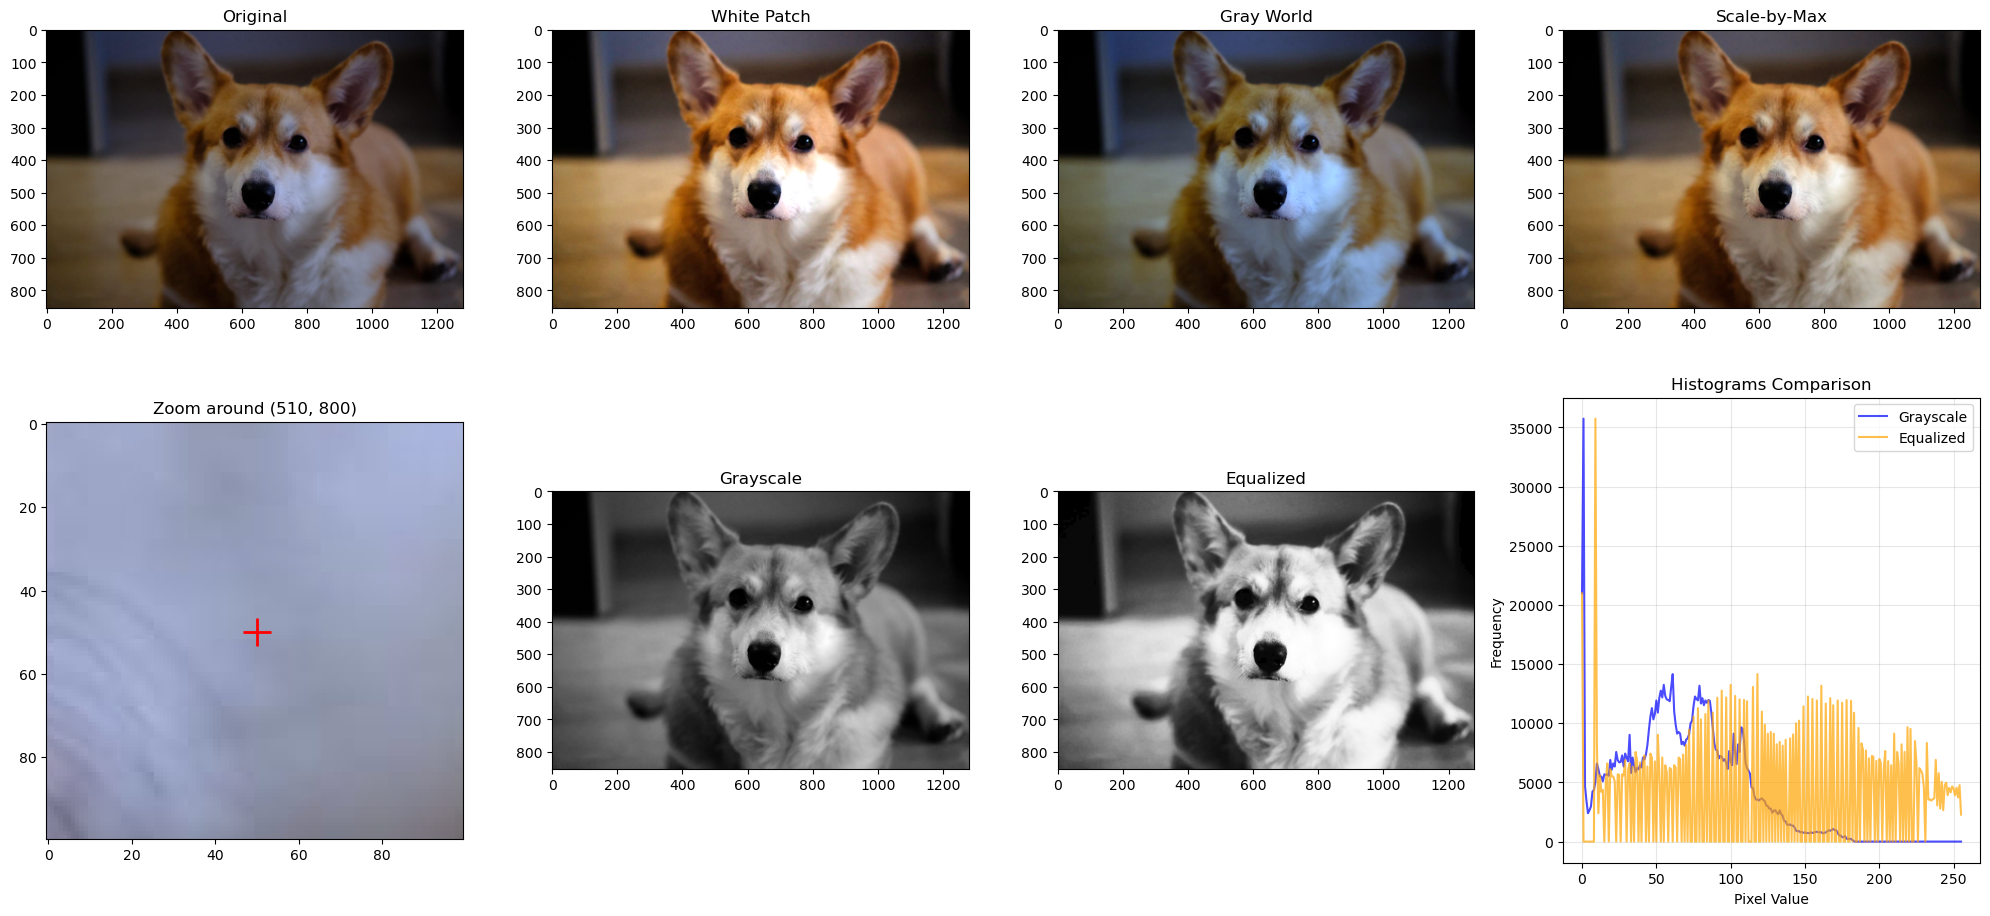

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]


img = cv2.imread('data/9083.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# ===== WHITE PATCH =====
row, col = 510, 800
white = img[row, col, :]
coeffs_wp = 255.0/white
white_balanced = np.zeros_like(img, dtype=np.float32)

# Zooming
zoom_size = 50
row_start = max(0, row - zoom_size)
row_end = min(img.shape[0], row + zoom_size)
col_start = max(0, col - zoom_size)
col_end = min(img.shape[1], col + zoom_size)
zoomed = img[row_start:row_end, col_start:col_end, :]

for channel in range(3):
    white_balanced[..., channel] = img[..., channel] * coeffs_wp[channel]
white_balanced = white_balanced/255
white_balanced[white_balanced > 1] = 1

# ===== GRAY WORLD =====
mean_r = np.mean(img[:, :, 0])
mean_g = np.mean(img[:, :, 1])
mean_b = np.mean(img[:, :, 2])
max_mean = max(mean_r, mean_g, mean_b)
kr = max_mean / mean_r
kg = max_mean / mean_g
kb = max_mean / mean_b
gray_world_balanced = np.zeros_like(img, dtype=np.float32)
gray_world_balanced[:, :, 0] = img[:, :, 0] * kr
gray_world_balanced[:, :, 1] = img[:, :, 1] * kg
gray_world_balanced[:, :, 2] = img[:, :, 2] * kb
gray_world_balanced = np.clip(gray_world_balanced, 0, 255).astype(np.uint8)

# ===== SCALE-BY-MAX =====
max_r = np.max(img[:, :, 0])
max_g = np.max(img[:, :, 1])
max_b = np.max(img[:, :, 2])
scale_max_balanced = np.zeros_like(img, dtype=np.float32)
scale_max_balanced[:, :, 0] = (img[:, :, 0] / max_r) * 255
scale_max_balanced[:, :, 1] = (img[:, :, 1] / max_g) * 255
scale_max_balanced[:, :, 2] = (img[:, :, 2] / max_b) * 255
scale_max_balanced = scale_max_balanced.astype(np.uint8)

# ===== GRAYSCALE + HISTOGRAM EQUALIZATION =====
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img_equalized = cv2.equalizeHist(img_gray)

# HISTOGRAM Calculation
hist_gray = cv2.calcHist([img_gray], [0], None, [256], [0, 256])
hist_eq = cv2.calcHist([img_equalized], [0], None, [256], [0, 256])

# ===== Compare 2 rows 4 col(s) =====
plt.subplot(241), plt.imshow(img), plt.title('Original')
plt.subplot(242), plt.imshow(white_balanced), plt.title('White Patch')
plt.subplot(243), plt.imshow(gray_world_balanced), plt.title('Gray World')
plt.subplot(244), plt.imshow(scale_max_balanced), plt.title('Scale-by-Max')

plt.subplot(245), plt.imshow(zoomed), plt.title(f'Zoom around ({row}, {col})')
plt.plot(zoom_size, zoom_size, 'r+', markersize=20, markeredgewidth=2)

plt.subplot(246), plt.imshow(img_gray, cmap='gray'), plt.title('Grayscale')
plt.subplot(247), plt.imshow(img_equalized, cmap='gray'), plt.title('Equalized')

plt.subplot(248)
plt.plot(hist_gray, label='Grayscale', alpha=0.7, color='blue')
plt.plot(hist_eq, label='Equalized', alpha=0.7, color='orange')
plt.title('Histograms Comparison')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()